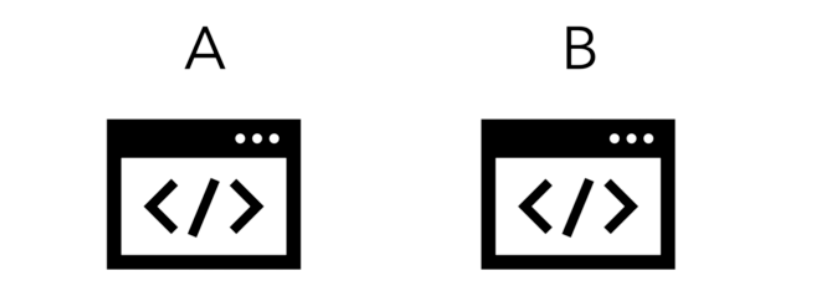

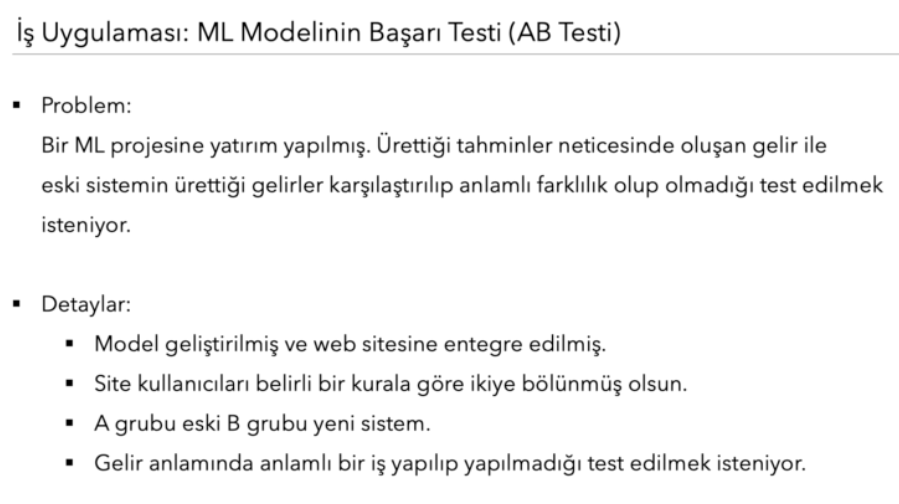

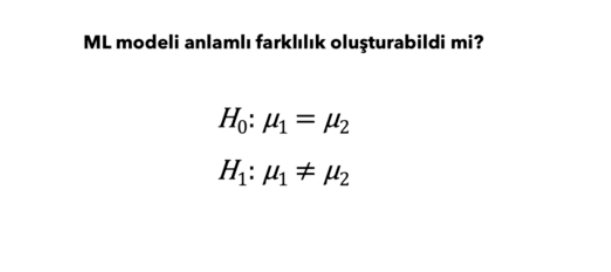

In [1]:
import pandas as pd
A = pd.DataFrame([30,27,21,27,29,30,20,20,27,32,35,22,24,23,25,27,23,27,23,
        25,21,18,24,26,33,26,27,28,19,25])

B = pd.DataFrame([37,39,31,31,34,38,30,36,29,28,38,28,37,37,30,32,31,31,27,
        32,33,33,33,31,32,33,26,32,33,29])


A_B = pd.concat([A, B], axis = 1)
A_B.columns = ["A","B"]

A_B.head()

,A,B
0,30,37
1,27,39
2,21,31
3,27,31
4,29,34


In [ ]:
# Data type 2

In [2]:
import numpy as np
A = pd.DataFrame([30,27,21,27,29,30,20,20,27,32,35,22,24,23,25,27,23,27,23,
        25,21,18,24,26,33,26,27,28,19,25])

B = pd.DataFrame([37,39,31,31,34,38,30,36,29,28,38,28,37,37,30,32,31,31,27,
        32,33,33,33,31,32,33,26,32,33,29])

#A ve A'nın grubu
GRUP_A = np.arange(len(A))
GRUP_A = pd.DataFrame(GRUP_A)
GRUP_A[:] = "A"
A = pd.concat([A, GRUP_A], axis = 1)

#B ve B'nin Grubu
GRUP_B = np.arange(len(B))
GRUP_B = pd.DataFrame(GRUP_B)
GRUP_B[:] = "B"
B = pd.concat([B, GRUP_B], axis = 1)

#Tum veri
AB = pd.concat([A,B])
AB.columns = ["gelir","GRUP"]
print(AB.head())
print(AB.tail())

   gelir GRUP
0     30    A
1     27    A
2     21    A
3     27    A
4     29    A
    gelir GRUP
25     33    B
26     26    B
27     32    B
28     33    B
29     29    B


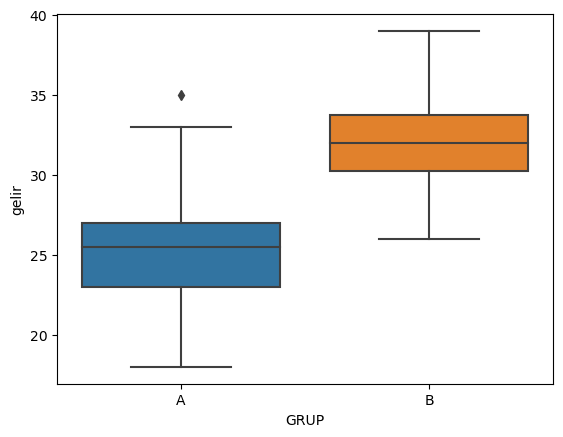

In [3]:
import seaborn as sns
sns.boxplot(x = "GRUP", y = "gelir", data = AB);

In [4]:
# Variance homogeneity test

In [5]:
from scipy.stats import shapiro

In [8]:
shapiro(A_B.A) 


ShapiroResult(statistic=0.978924572467804, pvalue=0.7962900400161743)

In [9]:
shapiro(A_B.B) 

ShapiroResult(statistic=0.9561262130737305, pvalue=0.24584470689296722)

In [10]:
# normality test is passed


In [12]:
# Variance homogeneity test h0: variances are homogenous h1: variances are not homogenous


In [18]:
import scipy.stats as stats
stats.levene(A_B.A, A_B.B)
# p value is greater than 0.05, so we can not reject the null hypothesis.

LeveneResult(statistic=1.1101802757158004, pvalue=0.2964124900636569)

In [19]:
# Hypothesis test

In [20]:
stats.ttest_ind(A_B["A"], A_B["B"], equal_var = True)

TtestResult(statistic=-7.028690967745927, pvalue=2.6233215605475075e-09, df=58.0)

In [22]:
# p value is less than 0.05, so we can reject the null hypothesis. There is a significant difference between A and B groups.

In [23]:
test_statistic, pvalue = stats.ttest_ind(A_B["A"], A_B["B"], equal_var=True)
print('Test statistics = %.4f, p-value = %.4f' % (test_statistic, pvalue))

Test statistics = -7.0287, p-value = 0.0000


In [24]:
# Nonparametric Hypothesis Test

In [25]:
stats.mannwhitneyu(A_B["A"], A_B["B"])

MannwhitneyuResult(statistic=89.5, pvalue=9.557950378612535e-08)

In [26]:
test_statistic, pvalue = stats.mannwhitneyu(A_B["A"], A_B["B"])
print('test_statistic= %.4f, p value = %.4f' % (test_statistic, pvalue))

test_statistic= 89.5000, p value = 0.0000
